In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence
#from keras.preprocessing.sequence import pad_sequences
import numpy as np

max_features = 10000
maxlen=500
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)

print(len(input_train), 'input train sequences')
print(len(input_test), 'test sequences')

print('pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen = maxlen)
input_test = pad_sequences(input_test, maxlen = maxlen)

print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

25000 input train sequences
25000 test sequences
pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [17]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid')) # final layer is sometimes sigmoid

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy', 
    metrics=['acc'])
history = model.fit(input_train, y_train,
                       epochs=10,
                       batch_size=123,
                       validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.4921 - acc: 0.7678 - val_loss: 0.3726 - val_acc: 0.8484
Epoch 2/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2888 - acc: 0.8865 - val_loss: 0.3026 - val_acc: 0.8712
Epoch 3/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.2332 - acc: 0.9092 - val_loss: 0.2840 - val_acc: 0.8808
Epoch 4/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1985 - acc: 0.9256 - val_loss: 0.3341 - val_acc: 0.8776
Epoch 5/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1753 - acc: 0.9352 - val_loss: 0.2854 - val_acc: 0.8840
Epoch 6/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1572 - acc: 0.9440 - val_loss: 0.3740 - val_acc: 0.8702
Epoch 7/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1402 - acc: 0.9505 - val_loss: 0.3038 - val_acc:

From the first movieReviewLearnIfPositive on this same IMDDB data set, I got about 87% from just two Dense layers with 16 channels each. 

It looks like for this LSTM case we beat it with about 89% accuracy

Note that the training loss keeps dropping as expected for training with  a gradient, but the validation loss tails off and the accuracy is about 87-89%   So this LSTM seems a bit better, though maybe not amazingly better.  It certainly ran faster--about 15 minutes versus hours on first, 2-Dense-layered one.

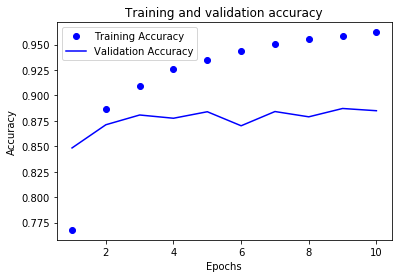

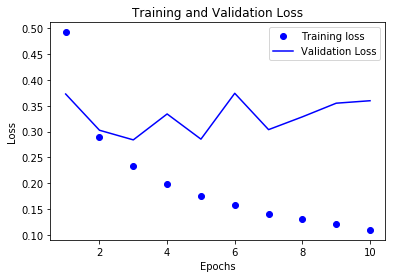

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
validation_acc = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']
#print("validation_loss: ", validation_loss) 

epochs = range(1,len(acc) + 1) # list for x axis

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()